In [70]:
import pandas as pd
import numpy as np

In [71]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

def clean(data):
    data = data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.fillna("U", inplace=True)
    return data
        # look at the type of ticket First Class -> Older, Married?, Doctor?, better prediction of Age
        
data = clean(data)
test = clean(test)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
    
data.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y = data["Survived"]
X = data.drop("Survived", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [74]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
penalty = ['l1', 'l2']

C = np.logspace(-2, 2, 100)
kfold = StratifiedKFold(n_splits=10)

lr_param_grid = {'C': C}
clf = GridSearchCV(LogisticRegression(), lr_param_grid)
gsLR = GridSearchCV(LR, param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs = 4, verbose = 1)
gsLR.fit(X_train, y_train)

LR_best = gsLR.best_estimator_

#print("Best penalty:", LR_best.get_params()['penalty'])
print("Best C:", LR_best.get_params()['C'])


predictions = LR_best.predict(X_val)
accuracy_score(y_val, predictions)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best C: 0.11233240329780277


0.8283582089552238

In [75]:
submission_preds = LR_best.predict(test)

In [95]:
print(len(submission_preds))

418


In [76]:
df = pd.DataFrame({"PassengerId":test_ids.values,
                  "Survived": submission_preds,}
                 )

In [12]:
df.to_csv("log_submission.csv", index=False)

## Knn Classifier

In [53]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
corr_matrix = df_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [55]:
dropped = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
df_train_set = df_train.drop(dropped, axis=1)
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
1,1,1,female,71.2833,C
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S


In [56]:
dropped2 = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
df_test_set = df_test.drop(dropped2, axis=1)
df_test_set.head()

,PassengerId,Pclass,Sex,Fare,Embarked
0,892,3,male,7.8292,Q
1,893,3,female,7.0000,S
2,894,2,male,9.6875,Q
3,895,3,male,8.6625,S
4,896,3,female,12.2875,S


In [57]:
mean = df_test_set["Fare"].mean()
df_test_set["Fare"] = df_test_set["Fare"].fillna(mean)

In [58]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_train_set.iloc[:, 2] = labelencoder.fit_transform(df_train_set.iloc[:, 2].values)
df_train_set.iloc[:,4] = labelencoder.fit_transform(df_train_set.iloc[:, 4].values)

df_test_set.iloc[:, 2] = labelencoder.fit_transform(df_test_set.iloc[:, 2].values)
df_test_set.iloc[:, 4] = labelencoder.fit_transform(df_test_set.iloc[:, 4].values)

In [59]:
X = df_train_set.iloc[:, 1:5].values
Y= df_train_set.iloc[:, 0].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

In [61]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [62]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
print(scores)

[0.773109243697479, 0.7366946778711485, 0.7619047619047619, 0.7787114845938375, 0.7450980392156863, 0.7198879551820728, 0.7282913165266106, 0.7282913165266106, 0.7282913165266106, 0.7338935574229691, 0.7394957983193278, 0.7366946778711485, 0.7086834733893558, 0.7058823529411765, 0.711484593837535, 0.7142857142857143, 0.711484593837535, 0.7338935574229691, 0.7394957983193278, 0.7366946778711485, 0.7338935574229691, 0.7310924369747899, 0.7198879551820728, 0.7198879551820728, 0.6946778711484594]


0.7787114845938375


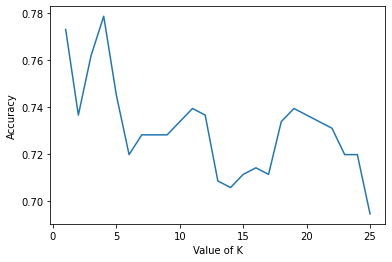

In [63]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
print(max(scores))

In [64]:
test = df_test_set.iloc[:, 1:5].values

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(test)
#print(accuracy_score(y_test, y_pred))

df = pd.DataFrame({"PassengerId":test_ids.values,
                  "Survived": y_pred,}
                 )
df.to_csv("knn_submission.csv", index=False)

## XGB Classifier

In [14]:
from xgboost import XGBClassifier

XGB = XGBClassifier()

max_depth = [1,2,4,8,10]
min_child_weight = np.linspace(1, 10, 5, endpoint=True)
colsample_bytree = np.linspace(0.5, 1, 5, endpoint=True)

gamma = np.linspace(0.5, 5, 5, endpoint=True)
subsample = np.linspace(0.5, 1, 5, endpoint=True)

XGB_param_grid = {
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'max_depth': max_depth
        }

gsXGB = GridSearchCV(estimator = XGB, 
                    param_grid = XGB_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)



In [15]:
gsXGB.fit(X_train, y_train)

XGB_best = gsXGB.best_estimator_
print(XGB_best.get_params())
print(gsXGB.best_score_)


Fitting 10 folds for each of 3125 candidates, totalling 31250 fits
{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.875, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 1.625, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 4, 'max_leaves': 0, 'min_child_weight': 1.0, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 0.875, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
0.8427291346646186


## RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier


In [22]:
RFC = RandomForestClassifier()

n_estim = [int(x) for x in np.linspace(start=200, stop=1400, num=4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 20, num=5)]
max_depth.append(None)

min_samples_split = [5, 10]
min_samples_leaf = [2, 4]
bootstrap = [True, False]

rf_param_grid = {"max_depth": max_depth,
              "max_features": max_features,
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf,
              "bootstrap": bootstrap,
              "n_estimators" :n_estim,
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

print(RFC_best.get_params())
print(gsRFC.best_score_)


Fitting 10 folds for each of 384 candidates, totalling 3840 fits
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1400, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.8394265232974911


## Voting

In [77]:
from sklearn.ensemble import VotingClassifier

In [89]:
votingC = VotingClassifier(estimators=[('LR', LR_best), ('XGB', XGB_best), ('RFC', RFC_best)], voting ='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

In [97]:
test_pred = pd.Series(votingC.predict(X_train), name='Survived')

y_pred = votingC.predict(test)
#print(len(ids), len(test_ids.values), len(y_pred))
ids = pd.read_csv('test.csv')['PassengerId']
#print(len(y_val))
#print("Accuracy", accuracy_score(y_val, y_pred))

#print(len(ids), len(test_ids.values), len(y_pred))


df = pd.DataFrame({"PassengerId": test_ids.values,
                  "Survived": y_pred}
                 )
df.to_csv("vote_submission.csv", index=False)

418 418 418
